In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df=pd.read_csv('./cleaned_df.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [3]:
df=pd.read_csv('./cleaned_df.csv',index_col=0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2.0,1


In [4]:
# It is a classification problem where the difference between the ouputs are not disproporniately ditributed.
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
df.shape

(303, 14)

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.5 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,245.194719,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,48.488324,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

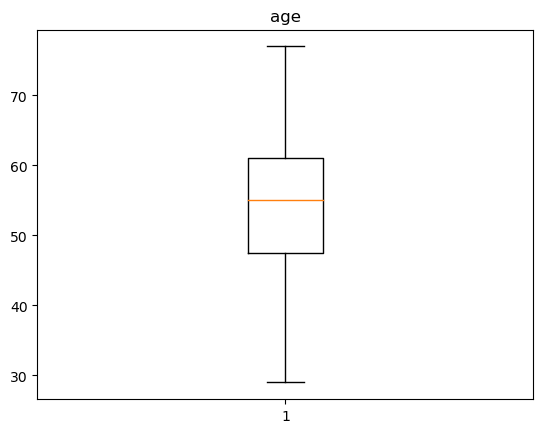

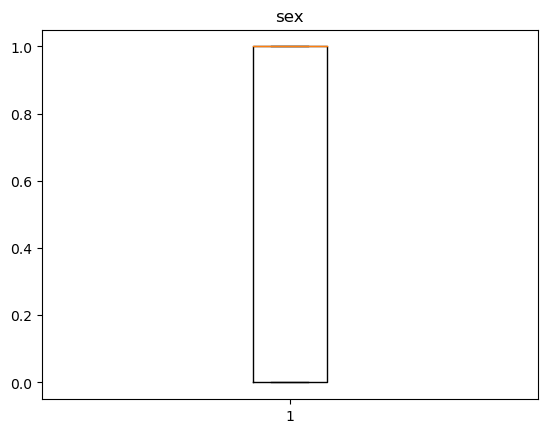

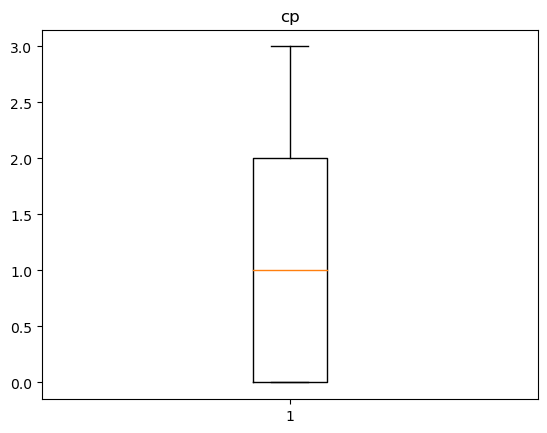

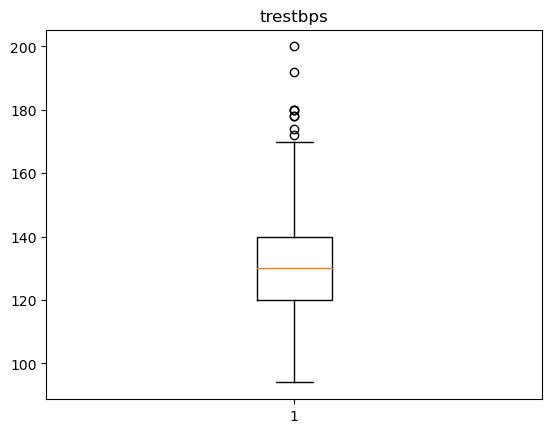

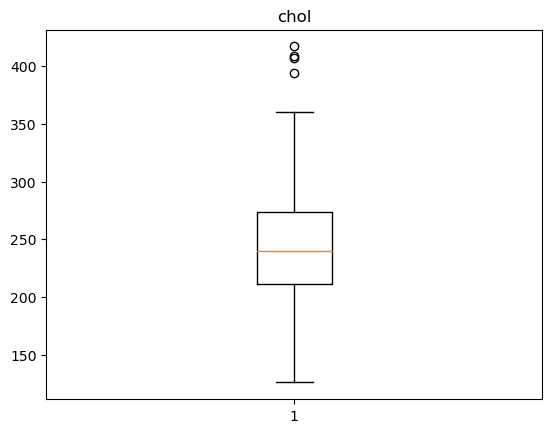

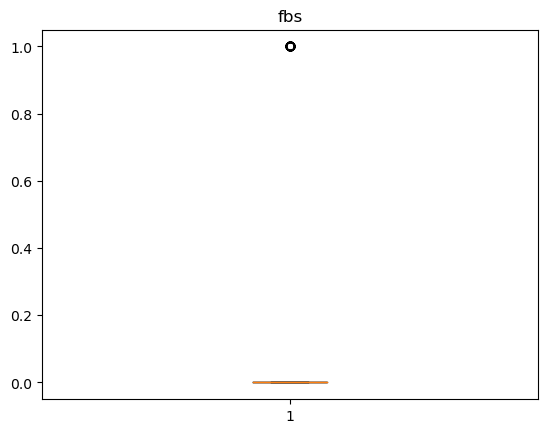

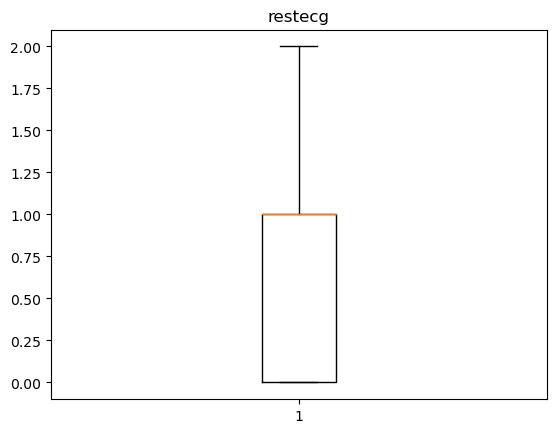

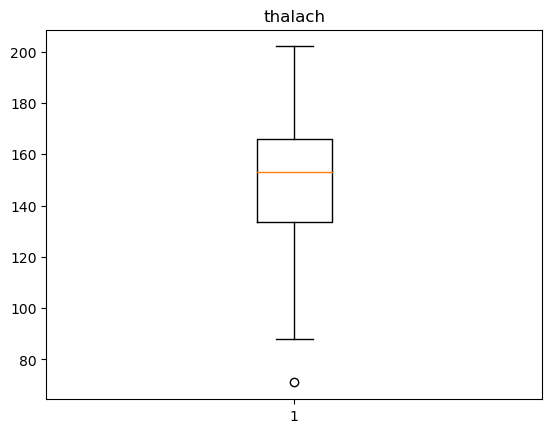

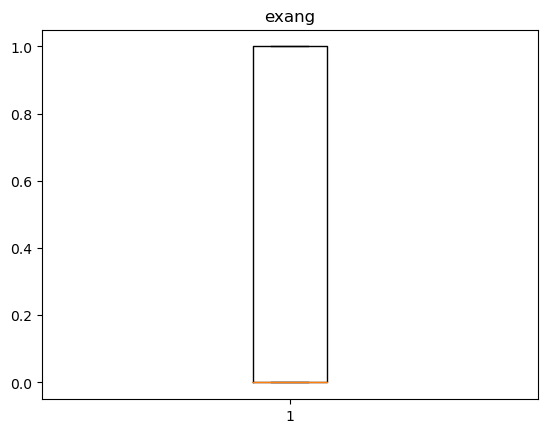

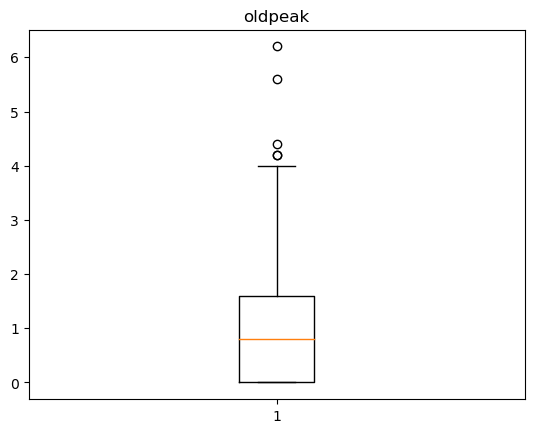

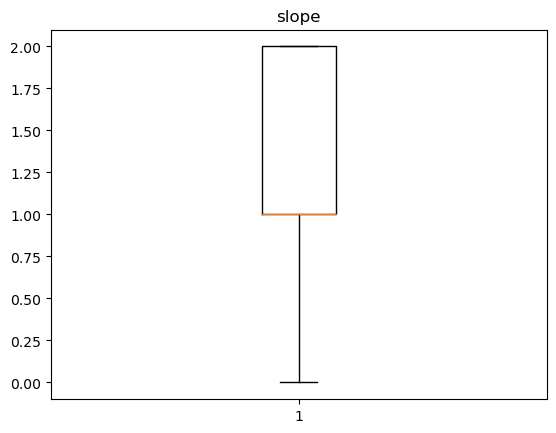

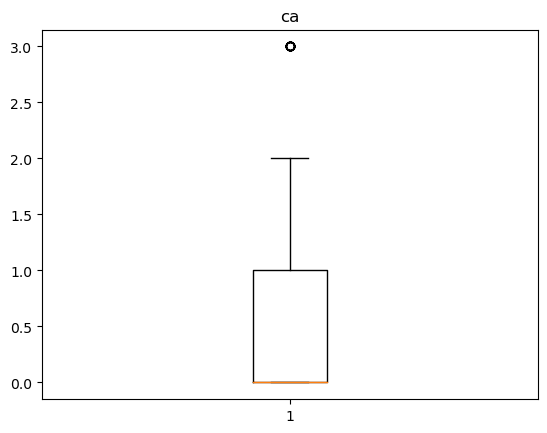

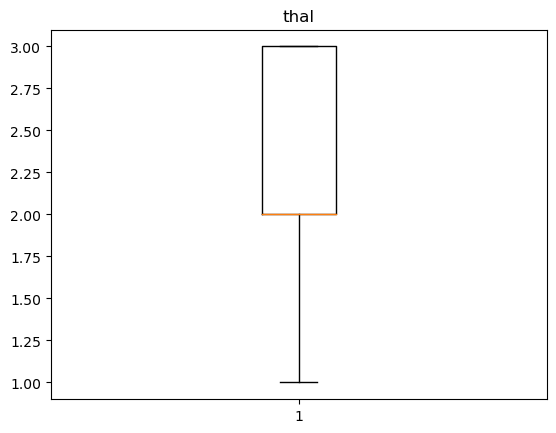

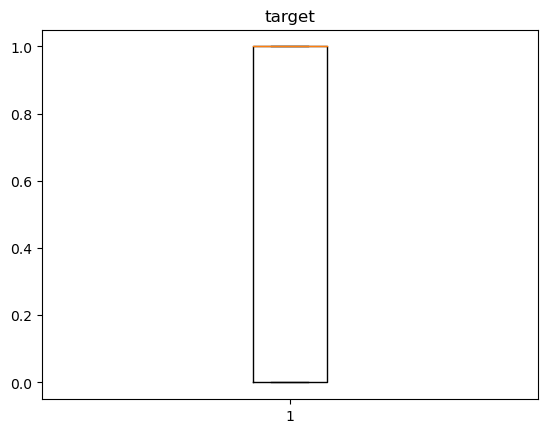

In [10]:
for i in df.columns:
    if df[i].dtype!='obj':
        plt.boxplot(data=df,x=i)
        plt.title(i)
        plt.show()

In [11]:
outlist=['trestbps','chol','oldpeak']

In [12]:
for j in outlist:
    Q1=df[j].quantile(0.25)
    Q3=df[j].quantile(0.75)
    IQR=Q3-Q1
    LL=Q1-(1.5*IQR)
    UL=Q3+(1.5*IQR)
    df=df[(df[j]>LL) & (df[j]<UL)]

In [13]:
# After removing the outliers the record has been reduced to 281 from 303 
df.shape

(281, 14)

<Axes: >

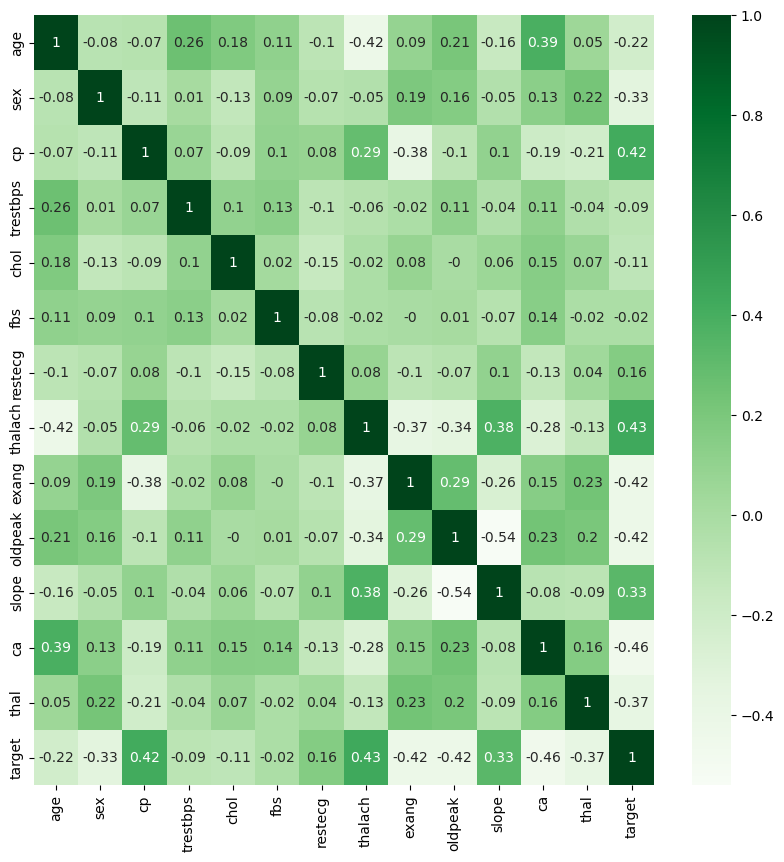

In [14]:
# Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(2),annot=True,cmap='Greens')

# Variance Inflation Factor

In [15]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features excluding the target
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'target')):
        col_list.append(col)

X = df[col_list]

# Calculate VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Check and drop the feature with the highest VIF if it exceeds the threshold (5 in this case)
if vif_data["VIF"].max() > 5:
    drop_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'feature']
    print(f"Dropping feature {drop_feature} with VIF {vif_data['VIF'].max()}")
    X = X.drop(columns=[drop_feature])

# Update the original dataframe
df = df[X.columns.tolist() + ['target']]
print("Remaining features after VIF filtering:")
print(X.columns)

Dropping feature trestbps with VIF 68.60881676872162
Remaining features after VIF filtering:
Index(['age', 'sex', 'cp', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [16]:
# Dividing the data into train-test split and performing standardization

In [17]:
X=pd.DataFrame(df.iloc[:,:-1])
y=pd.DataFrame(df.iloc[:,-1])
scaler=StandardScaler()

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,233,1,0,150,0,2.3,0,0.0,1.0
1,37,1,2,250,0,1,187,0,3.5,0,0.0,2.0
2,41,0,1,204,0,0,172,0,1.4,2,0.0,2.0
3,56,1,1,236,0,1,178,0,0.8,2,0.0,2.0
4,57,0,0,354,0,1,163,1,0.6,2,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,241,0,1,123,1,0.2,1,0.0,3.0
299,45,1,3,264,0,1,132,0,1.2,1,0.0,3.0
300,68,1,0,193,1,1,141,0,3.4,1,2.0,3.0
301,57,1,0,131,0,1,115,1,1.2,1,1.0,3.0


## Logistic Regression

In [18]:
Logreg=LogisticRegression()

Logreg.fit(X_train,y_train)
Logreg_y_pred=Logreg.predict(X_test)

Logreg_accscore=accuracy_score(y_test,Logreg_y_pred)
Logreg_f1score=f1_score(y_test,Logreg_y_pred)
Logreg_confusion_matrix=confusion_matrix(y_test,Logreg_y_pred)
Logreg_classification_report=classification_report(y_test,Logreg_y_pred)


print(f"Accuracy score:{Logreg_accscore}")
print(f"F1 score:{Logreg_f1score}")
print('\n')
print("Confusion_matrix")
print(Logreg_confusion_matrix)
print('\n')
print("Classification_report")
print(Logreg_classification_report)

Accuracy score:0.8732394366197183
F1 score:0.8860759493670887


Confusion_matrix
[[27  3]
 [ 6 35]]


Classification_report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.92      0.85      0.89        41

    accuracy                           0.87        71
   macro avg       0.87      0.88      0.87        71
weighted avg       0.88      0.87      0.87        71



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Decision Tree

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create the parameter grid
param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [3, 5, 7, 9, 11, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_leaf_nodes': [2,5,10,None]
}

# Initialize the model
dt = DecisionTreeClassifier()

# Initialize the grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data 
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best accuracy score:  0.8095238095238095


In [20]:
dt=DecisionTreeClassifier(criterion= 'gini', max_depth= 3, max_leaf_nodes= 10, min_samples_leaf= 15, min_samples_split=2)

dt.fit(X_train,y_train)
dt_y_pred=dt.predict(X_test)

dt_accscore=accuracy_score(y_test,dt_y_pred)
dt_f1score=f1_score(y_test,dt_y_pred)
dt_confusion_matrix=confusion_matrix(y_test,dt_y_pred)
dt_classification_report=classification_report(y_test,dt_y_pred)


print(f"Accuracy score:{dt_accscore}")
print(f"F1 score:{dt_f1score}")
print('\n')
print("Confusion_matrix")
print(dt_confusion_matrix)
print('\n')
print("Classification_report")
print(dt_classification_report)

Accuracy score:0.8028169014084507
F1 score:0.8157894736842105


Confusion_matrix
[[26  4]
 [10 31]]


Classification_report
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.89      0.76      0.82        41

    accuracy                           0.80        71
   macro avg       0.80      0.81      0.80        71
weighted avg       0.82      0.80      0.80        71



In [21]:
## Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],               # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],             # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30],              # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be at a leaf node
    'max_samples': [0.5, 0.7, 1.0]                # Fraction of samples to be used for fitting each tree (only if bootstrap=True)
}

# Initialize the model
rf=RandomForestClassifier()

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data 
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

In [ ]:
rf=RandomForestClassifier(max_depth= 10, max_features= 'log2', max_samples= 1, min_samples_leaf= 4, min_samples_split= 5, n_estimators= 50)

rf.fit(X_train,y_train)
rf_y_pred=rf.predict(X_test)

rf_accscore=accuracy_score(y_test,rf_y_pred)
rf_f1score=f1_score(y_test,rf_y_pred)
rf_confusion_matrix=confusion_matrix(y_test,rf_y_pred)
rf_classification_report=classification_report(y_test,rf_y_pred)

print(f"Accuracy score:{rf_accscore}")
print(f"F1 score:{rf_f1score}")
print('\n')
print("Confusion_matrix")
print(rf_confusion_matrix)
print('\n')
print("Classification_report")
print(rf_classification_report)

## Naive Baye's

In [ ]:
nb=GaussianNB()

nb.fit(X_train,y_train)
nb_y_pred=nb.predict(X_test)

nb_accscore=accuracy_score(y_test,nb_y_pred)
nb_f1score=f1_score(y_test,nb_y_pred)
nb_confusion_matrix=confusion_matrix(y_test,nb_y_pred)
nb_classification_report=classification_report(y_test,nb_y_pred)

print(f"Accuracy score:{nb_accscore}")
print(f"F1 score:{nb_f1score}")
print('\n')
print("Confusion_matrix")
print(nb_confusion_matrix)
print('\n')
print("Classification_report")
print(nb_classification_report)

In [ ]:
Model_accuracies=pd.DataFrame({'Model':['LogisticRegression','DecisionTree','RandomForest','GaussianNB'],
                                        'Accuracy':[Logreg_accscore,dt_accscore,rf_accscore,nb_accscore],
                             'F1 Score':[Logreg_f1score,dt_f1score,rf_f1score,nb_f1score]})

In [ ]:
Model_accuracies